In this notebook we explore the emission line measurements from the GAMA DR3: 
http://www.gama-survey.org/dr3/schema/dmu.php?id=8

In [ ]:
import numpy as np 
# -- feasibgs -- 
from feasibgs import util as UT
from feasibgs import catalogs as Cat

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

Read in GAMA-Legacy catalog

In [21]:
# read in GAMA-Legacy catalog for the G09, G12, and G15 fields
cata = Cat.GamaLegacy()
fields = ['g09', 'g12', 'g15']
glegs = []
for field in fields: 
    gleg = cata.Read(field)
    cataid = gleg['gama-photo']['cataid'] # GAMA catalog id of each object
    ngal = len(cataid)
    print('%i galaxies in %s' % (ngal, field.upper()))
    glegs.append(gleg)

25759 galaxies in G09
29169 galaxies in G12
63004 galaxies in G15


The following 12 emission lines are measured using a simple Gaussian fit

In [8]:
emline_keys = ['oiib', 'oiir', 'hb',  'oiiib', 'oiiir', 'oib', 'oir', 'niib', 'ha', 'niir', 'siib', 'siir']
emline_lambda = [3726., 3729., 4861., 4959., 5007., 6300., 6364., 6548., 6563., 6583., 6717., 6731.]

Lets first take a look at the line fluxes

OIIB line flux ranges from -99999.000000 to 166023.921875
9372 galaxies have less than 0 OIIB line flux (0.079470)
--------------------------------
OIIR line flux ranges from -99999.000000 to 474517.625000
9372 galaxies have less than 0 OIIR line flux (0.079470)
--------------------------------
HB line flux ranges from -99999.000000 to 146935.453125
49133 galaxies have less than 0 HB line flux (0.416621)
--------------------------------
OIIIB line flux ranges from -99999.000000 to 193367.640625
19219 galaxies have less than 0 OIIIB line flux (0.162967)
--------------------------------
OIIIR line flux ranges from -99999.000000 to 574913.312500
26804 galaxies have less than 0 OIIIR line flux (0.227284)
--------------------------------
OIB line flux ranges from -99999.000000 to 54759.886719
35693 galaxies have less than 0 OIB line flux (0.302657)
--------------------------------
OIR line flux ranges from -99999.000000 to 51845.441406
64188 galaxies have less than 0 OIR line flux (0.544280

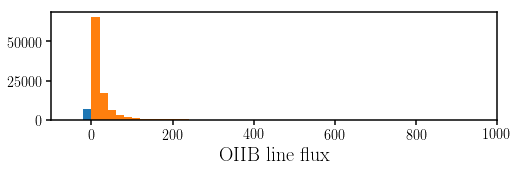

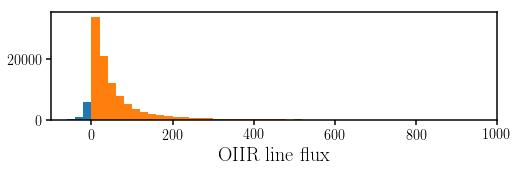

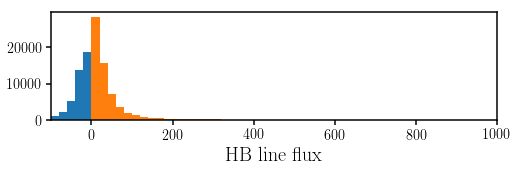

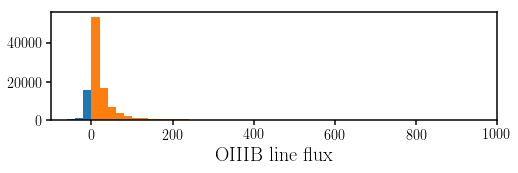

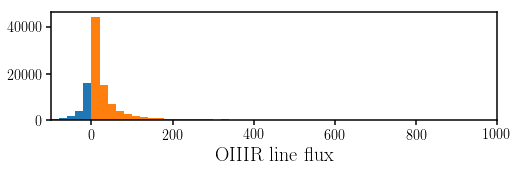

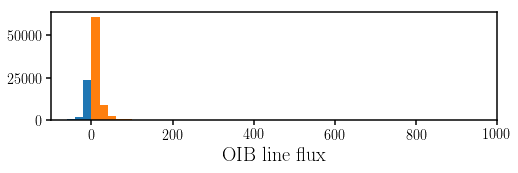

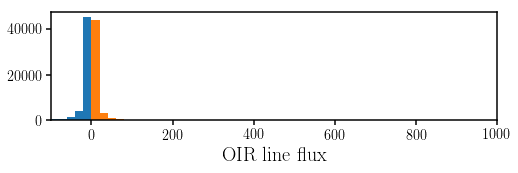

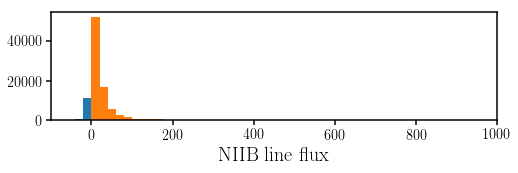

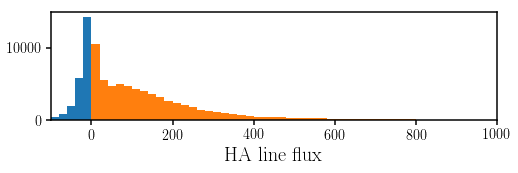

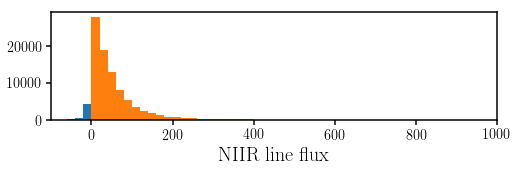

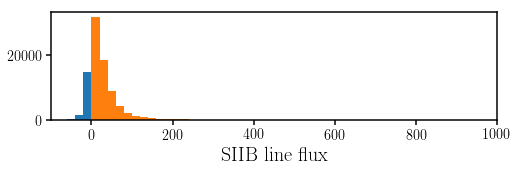

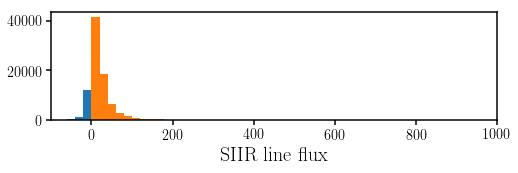

In [32]:
for k in emline_keys: 
    fig = plt.figure(figsize=(8,2))
    em_flux_all = []
    for i, gleg in enumerate(glegs): 
        em_flux_all.append(gleg['gama-spec'][k+'_flux']) 
    em_flux_all = np.concatenate(em_flux_all)

    sub = fig.add_subplot(111)
    print('%s line flux ranges from %f to %f' % (k.upper(), em_flux_all.min(), em_flux_all.max()))
    neg = (em_flux_all <= 0.) 
    print('%i galaxies have less than 0 %s line flux (%f)' % (np.sum(neg), k.upper(), float(np.sum(neg))/float(len(em_flux_all))))
    print('--------------------------------')
    _ = sub.hist(em_flux_all, range=(-1e3, 1e3), bins=100)
    _ = sub.hist(em_flux_all[np.invert(neg)], range=(-1e3, 1e3), bins=100)
    sub.set_xlim([-1e2, 1e3])
    sub.set_xlabel(k.upper()+' line flux', fontsize=20)

OIIB line width ranges from -99999.000000 to 14.432223
349 galaxies have less than or equal 0 OIIB line width (0.002959)
negative line width ranges from -99999.000000 to -99999.000000
--------------------------------
OIIR line width ranges from -99999.000000 to 14.437367
349 galaxies have less than or equal 0 OIIR line width (0.002959)
negative line width ranges from -99999.000000 to -99999.000000
--------------------------------
HB line width ranges from -99999.000000 to 15.987283
209 galaxies have less than or equal 0 HB line width (0.001772)
negative line width ranges from -99999.000000 to -99999.000000
--------------------------------
OIIIB line width ranges from -99999.000000 to 24.296837
209 galaxies have less than or equal 0 OIIIB line width (0.001772)
negative line width ranges from -99999.000000 to -99999.000000
--------------------------------
OIIIR line width ranges from -99999.000000 to 24.414742
209 galaxies have less than or equal 0 OIIIR line width (0.001772)
negative li

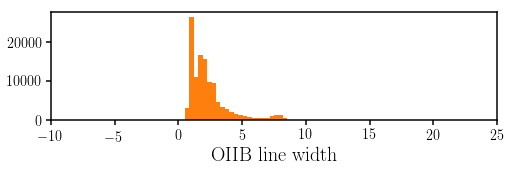

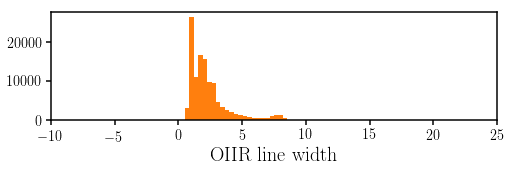

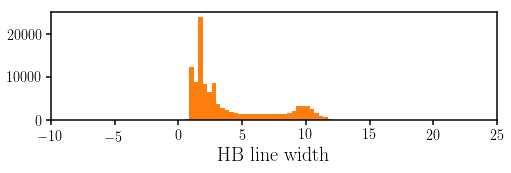

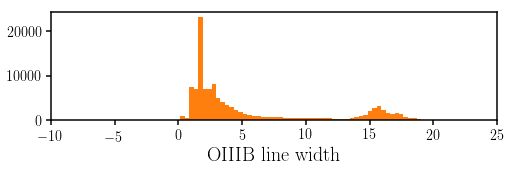

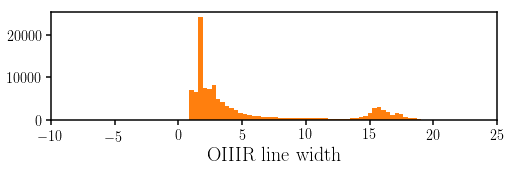

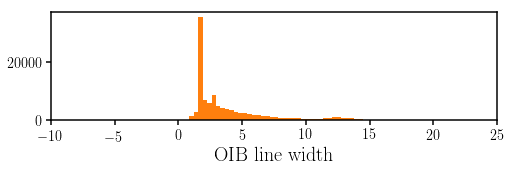

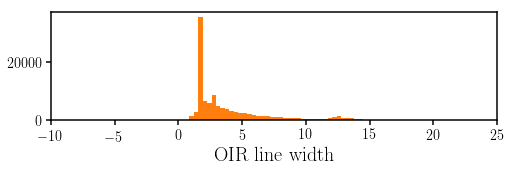

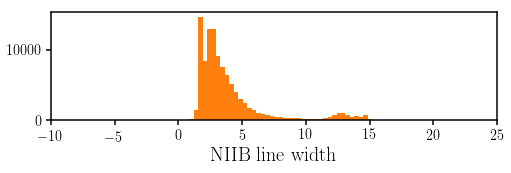

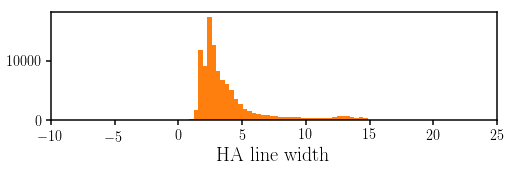

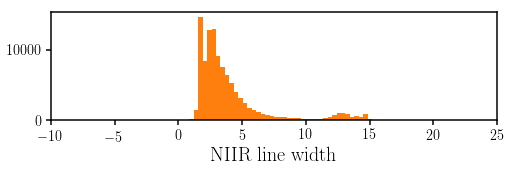

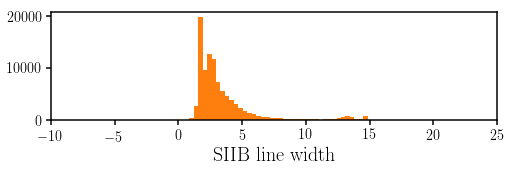

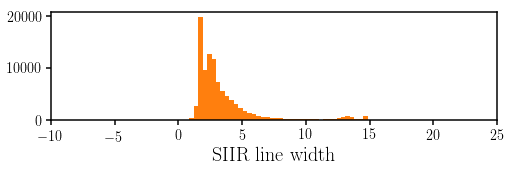

In [35]:
for k in emline_keys: 
    fig = plt.figure(figsize=(8,2))
    em_flux_all = []
    for i, gleg in enumerate(glegs): 
        em_flux_all.append(gleg['gama-spec']['sig_'+k]) 
    em_flux_all = np.concatenate(em_flux_all)

    sub = fig.add_subplot(111)
    print('%s line width ranges from %f to %f' % (k.upper(), em_flux_all.min(), em_flux_all.max()))
    neg = (em_flux_all <= 0.) 
    print('%i galaxies have less than or equal 0 %s line width (%f)' % (np.sum(neg), k.upper(), float(np.sum(neg))/float(len(em_flux_all))))
    print('negative line width ranges from %f to %f' % (em_flux_all[neg].min(), em_flux_all[neg].max()))
    print('--------------------------------')
    _ = sub.hist(em_flux_all, range=(-10, 25), bins=100)
    _ = sub.hist(em_flux_all[np.invert(neg)], range=(-10, 25), bins=100)
    sub.set_xlim([-10, 25])
    sub.set_xlabel(k.upper()+' line width', fontsize=20)

In [39]:
for k in emline_keys: 
    em_flux_all, em_sig_all = [], [] 
    for i, gleg in enumerate(glegs): 
        em_flux_all.append(gleg['gama-spec'][k+'_flux']) 
        em_sig_all.append(gleg['gama-spec']['sig_'+k]) 
    em_flux_all = np.concatenate(em_flux_all)
    em_sig_all = np.concatenate(em_sig_all)

    # em line with no width
    nowidth = (em_sig_all <= 0.)
    assert em_sig_all[nowidth].min() == -99999.
    assert em_sig_all[nowidth].max() == -99999.
    print('%i galaxies have less than or equal 0 %s line width (%f)' % (np.sum(neg), k.upper(), float(np.sum(neg))/float(len(em_flux_all))))
    print('line flux of galaxies with no line width ranges from %f to %f' % (em_flux_all[nowidth].min(), em_flux_all[nowidth].max()))    
    print('--------------------------------')

18715 galaxies have less than or equal 0 OIIB line width (0.158693)
line flux of galaxies with no line width ranges from -99999.000000 to -99999.000000
--------------------------------
18715 galaxies have less than or equal 0 OIIR line width (0.158693)
line flux of galaxies with no line width ranges from -99999.000000 to -99999.000000
--------------------------------
18715 galaxies have less than or equal 0 HB line width (0.158693)
line flux of galaxies with no line width ranges from -99999.000000 to -99999.000000
--------------------------------
18715 galaxies have less than or equal 0 OIIIB line width (0.158693)
line flux of galaxies with no line width ranges from -99999.000000 to -99999.000000
--------------------------------
18715 galaxies have less than or equal 0 OIIIR line width (0.158693)
line flux of galaxies with no line width ranges from -99999.000000 to -99999.000000
--------------------------------
18715 galaxies have less than or equal 0 OIB line width (0.158693)
line flu

Galaxies that do not have a line width, also do not have emission line fluxes. Therefore we don't have to worry about some adhoc prescription for line widhts. 